<a href="https://colab.research.google.com/github/BiswarupMukherjee1/LogisticRegressionQuestions/blob/main/Assignment_1_Fundamentals_and_Basic_Tools_of_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1: Nonlinear transformations**
Biswarup Mukherjee
DLPGC5

### **Question 1**

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:

# PART A


# Load the dataset
data = np.load('/content/drive/MyDrive/IPCVai_Sem1/Deep Learning/Assignment 1/data/rings.npz')

print("Available keys in rings.npz:", data.files)
print()

Available keys in rings.npz: ['X', 'X_test', 'Y', 'Y_test']



In [7]:
import numpy as np
import matplotlib.pyplot as plt

def visualise_nonlin(fun, X, Y, resolution=50):
    """
    Visualises the dataset together with the separator

    Example usage:

        def hypothesis(x):
            return np.sign(x @ w)
        visualise_nonlin(hypothesis, X, Y)

    # Parameters
    fun (callable): a function that outputs, for each sample in the argument
        array X, the class it belongs to (this is your hypothesis in Python
        function form). The class should be -1 or +1.
    X (array-like): an Nx2 matrix of input elements
    Y (array-like): an Nx1 matrix of labels
    """
    fig, ax = plt.subplots()
    # Data
    plot_data(X, Y, ax)
    # Separator
    x = np.linspace(-5, 5, resolution)
    xx, yy = np.meshgrid(x, x)
    grid = np.c_[xx.flatten(), yy.flatten()]
    decisions = fun(grid)
    ax.contour(
        xx, yy, decisions.reshape(resolution, resolution), levels=np.array([0]))
    # Annotations
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.grid(True)
    fig.tight_layout()
    return fig, ax

def plot_data(X, Y, ax):
    positive_samples = X[Y[:, 0] == 1, :]
    negative_samples = X[Y[:, 0] == -1, :]
    ax.plot(positive_samples[:, 0], positive_samples[:, 1], 'x', label='$+1$')
    ax.plot(negative_samples[:, 0], negative_samples[:, 1], 'o', label='$-1$')


In [9]:
# Load the dataset (already split into train/test)
data = np.load('/content/drive/MyDrive/IPCVai_Sem1/Deep Learning/Assignment 1/data/rings.npz')

## PART A: Load and Visualize Data

In [10]:
print("\nAvailable keys in rings.npz:", data.files)



Available keys in rings.npz: ['X', 'X_test', 'Y', 'Y_test']


In [11]:
# Load training and test data
X_train = data['X']
Y_train = data['Y']
X_test = data['X_test']
Y_test = data['Y_test']

# Ensure Y is 2D with shape (N, 1)
if len(Y_train.shape) == 1:
    Y_train = Y_train.reshape(-1, 1)
if len(Y_test.shape) == 1:
    Y_test = Y_test.reshape(-1, 1)

In [12]:
print(f"\nDataset loaded successfully!")
print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {Y_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Test labels shape: {Y_test.shape}")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Unique classes: {np.unique(Y_train)}")


Dataset loaded successfully!
Training features shape: (500, 2)
Training labels shape: (500, 1)
Test features shape: (100, 2)
Test labels shape: (100, 1)
Number of training samples: 500
Number of test samples: 100
Number of features: 2
Unique classes: [-1  1]


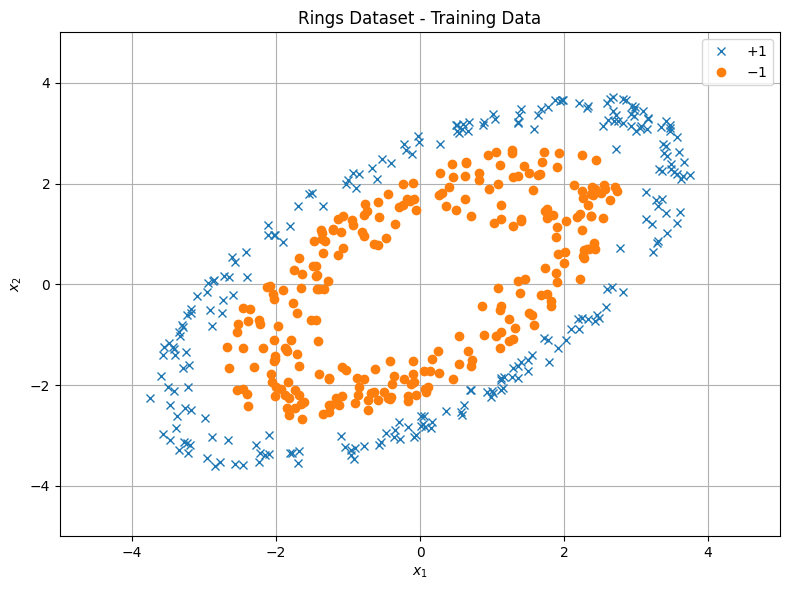

In [13]:
# Visualize the training data using the provided function
fig, ax = plt.subplots(figsize=(8, 6))
plot_data(X_train, Y_train, ax)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Rings Dataset - Training Data')
ax.legend()
ax.grid(True)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.tight_layout()
plt.show()

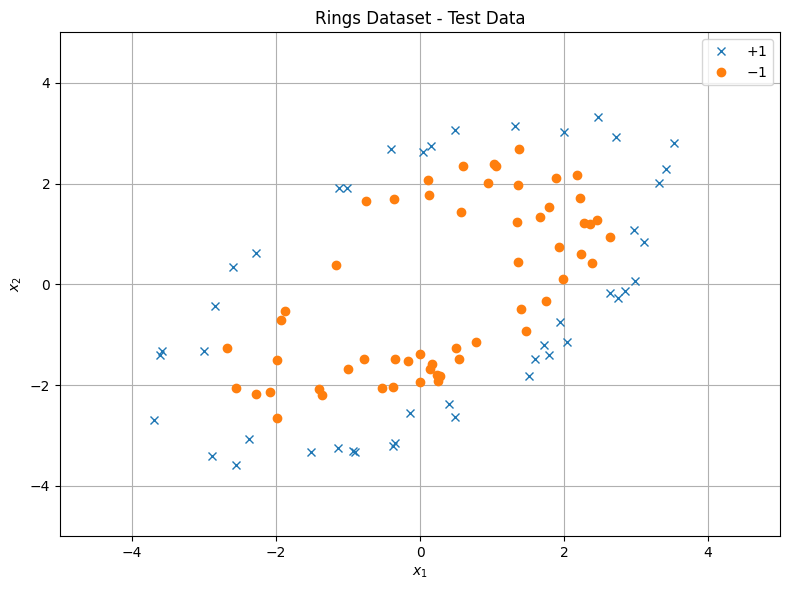

In [14]:
# Visualize the test data
fig, ax = plt.subplots(figsize=(8, 6))
plot_data(X_test, Y_test, ax)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Rings Dataset - Test Data')
ax.legend()
ax.grid(True)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.tight_layout()
plt.show()


## PART B

In [15]:
# Train logistic regression
clf_linear = LogisticRegression(max_iter=1000, random_state=42)
clf_linear.fit(X_train, Y_train.ravel())

# Create hypothesis function for visualization
def hypothesis_linear(X):
    """Returns values for contour plotting (decision function)"""
    return clf_linear.decision_function(X)

# Make predictions (convert to -1/+1)
y_train_pred_linear = clf_linear.predict(X_train)
y_test_pred_linear = clf_linear.predict(X_test)

# Calculate errors
train_error_linear = np.mean(y_train_pred_linear != Y_train.ravel())
test_error_linear = np.mean(y_test_pred_linear != Y_test.ravel())
train_accuracy_linear = 1 - train_error_linear
test_accuracy_linear = 1 - test_error_linear

print(f"\nLinear Classifier Results:")
print(f"Training Error: {train_error_linear:.4f} ({train_error_linear*100:.2f}%)")
print(f"Test Error: {test_error_linear:.4f} ({test_error_linear*100:.2f}%)")
print(f"Training Accuracy: {train_accuracy_linear:.4f} ({train_accuracy_linear*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_linear:.4f} ({test_accuracy_linear*100:.2f}%)")




Linear Classifier Results:
Training Error: 0.4560 (45.60%)
Test Error: 0.4900 (49.00%)
Training Accuracy: 0.5440 (54.40%)
Test Accuracy: 0.5100 (51.00%)


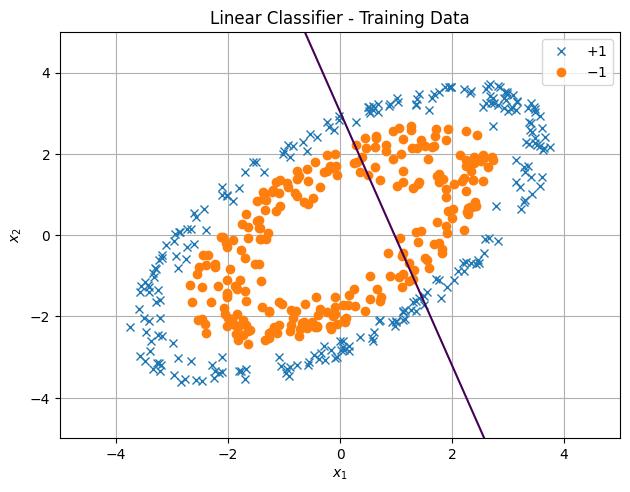

Plotting Linear Classifier on Test Data...


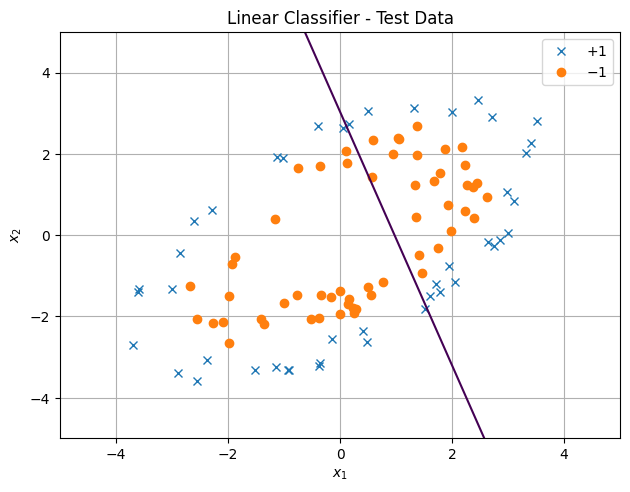

In [17]:
# Plot decision boundary using provided function

visualise_nonlin(hypothesis_linear, X_train, Y_train)
plt.title('Linear Classifier - Training Data')
plt.show()

print("Plotting Linear Classifier on Test Data...")
visualise_nonlin(hypothesis_linear, X_test, Y_test)
plt.title('Linear Classifier - Test Data')
plt.show()

## PART C Add Norm Feature

In [18]:
# Compute L2 norm for training and test sets
norm_train = np.linalg.norm(X_train, axis=1).reshape(-1, 1)
norm_test = np.linalg.norm(X_test, axis=1).reshape(-1, 1)

# Add norm as a new feature
X_train_norm = np.hstack([X_train, norm_train])
X_test_norm = np.hstack([X_test, norm_test])

print(f"\nOriginal feature shape: {X_train.shape}")
print(f"With norm feature shape: {X_train_norm.shape}")
print(f"Features: [x1, x2, ||x||_2]")
print(f"First sample original: {X_train[0]}")
print(f"First sample with norm: {X_train_norm[0]}")

# Train logistic regression with norm feature
clf_norm = LogisticRegression(max_iter=1000, random_state=42)
clf_norm.fit(X_train_norm, Y_train.ravel())



Original feature shape: (500, 2)
With norm feature shape: (500, 3)
Features: [x1, x2, ||x||_2]
First sample original: [3.28605633 0.81850662]
First sample with norm: [3.28605633 0.81850662 3.38646117]


LogisticRegression(max_iter=1000, random_state=42)

In [19]:
# Create hypothesis function for visualization (only uses first 2 features for grid)
def hypothesis_norm(X):
    """Returns values for contour plotting"""
    # Compute norm for the grid points
    norm_grid = np.linalg.norm(X, axis=1).reshape(-1, 1)
    X_with_norm = np.hstack([X, norm_grid])
    return clf_norm.decision_function(X_with_norm)


In [20]:
# Make predictions
y_train_pred_norm = clf_norm.predict(X_train_norm)
y_test_pred_norm = clf_norm.predict(X_test_norm)

# Calculate errors
train_error_norm = np.mean(y_train_pred_norm != Y_train.ravel())
test_error_norm = np.mean(y_test_pred_norm != Y_test.ravel())
train_accuracy_norm = 1 - train_error_norm
test_accuracy_norm = 1 - test_error_norm

In [21]:
print(f"\nClassifier with Norm Feature Results:")
print(f"Training Error: {train_error_norm:.4f} ({train_error_norm*100:.2f}%)")
print(f"Test Error: {test_error_norm:.4f} ({test_error_norm*100:.2f}%)")
print(f"Training Accuracy: {train_accuracy_norm:.4f} ({train_accuracy_norm*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_norm:.4f} ({test_accuracy_norm*100:.2f}%)")


Classifier with Norm Feature Results:
Training Error: 0.2460 (24.60%)
Test Error: 0.2700 (27.00%)
Training Accuracy: 0.7540 (75.40%)
Test Accuracy: 0.7300 (73.00%)



Plotting Classifier with Norm Feature on Training Data...


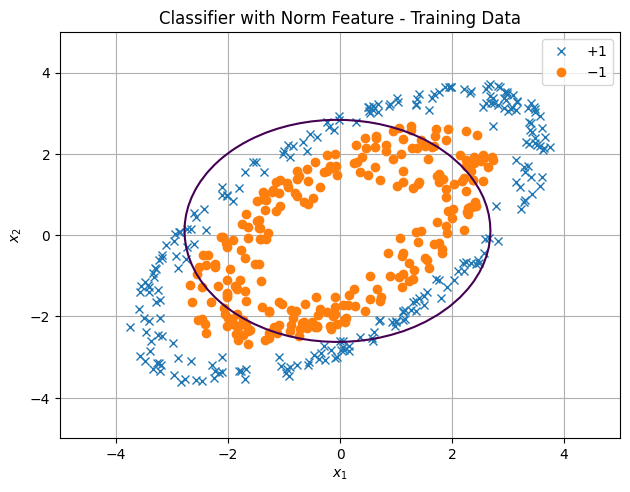

In [22]:
# Plot decision boundary
print("\nPlotting Classifier with Norm Feature on Training Data...")
visualise_nonlin(hypothesis_norm, X_train, Y_train)
plt.title('Classifier with Norm Feature - Training Data')
plt.show()

Plotting Classifier with Norm Feature on Test Data...


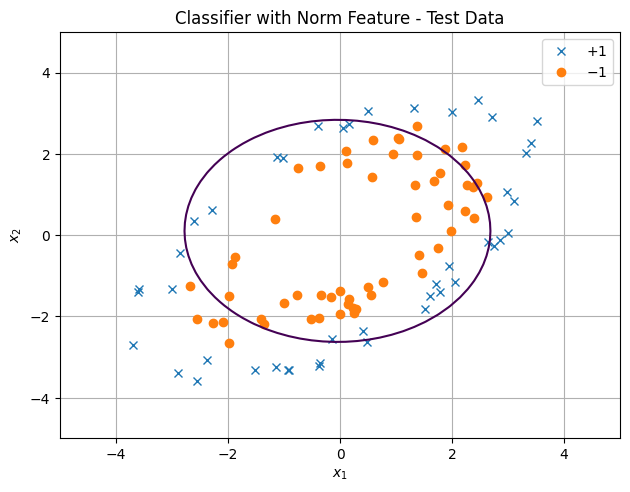

In [23]:
print("Plotting Classifier with Norm Feature on Test Data...")
visualise_nonlin(hypothesis_norm, X_test, Y_test)
plt.title('Classifier with Norm Feature - Test Data')
plt.show()

## Part D Classifier with Degree-2 Polynomial Features

In [24]:

# Create polynomial features: x1, x2, x1^2, x1*x2, x2^2
X_train_poly = np.hstack([
    X_train,                              # Original: x1, x2
    X_train[:, 0:1]**2,                   # x1^2
    X_train[:, 0:1] * X_train[:, 1:2],    # x1*x2
    X_train[:, 1:2]**2                    # x2^2
])

X_test_poly = np.hstack([
    X_test,                               # Original: x1, x2
    X_test[:, 0:1]**2,                    # x1^2
    X_test[:, 0:1] * X_test[:, 1:2],      # x1*x2
    X_test[:, 1:2]**2                     # x2^2
])

print(f"\nOriginal feature shape: {X_train.shape}")
print(f"With polynomial features shape: {X_train_poly.shape}")
print(f"Features: [x1, x2, x1^2, x1*x2, x2^2]")
print(f"First sample original: {X_train[0]}")
print(f"First sample with polynomial features: {X_train_poly[0]}")



Original feature shape: (500, 2)
With polynomial features shape: (500, 5)
Features: [x1, x2, x1^2, x1*x2, x2^2]
First sample original: [3.28605633 0.81850662]
First sample with polynomial features: [ 3.28605633  0.81850662 10.79816619  2.68965887  0.66995309]


In [25]:
# Train logistic regression with polynomial features
clf_poly = LogisticRegression(max_iter=1000, random_state=42)
clf_poly.fit(X_train_poly, Y_train.ravel())

LogisticRegression(max_iter=1000, random_state=42)

In [26]:
# Create hypothesis function for visualization
def hypothesis_poly(X):
    """Returns values for contour plotting"""
    # Compute polynomial features for grid points
    X_poly_grid = np.hstack([
        X,
        X[:, 0:1]**2,
        X[:, 0:1] * X[:, 1:2],
        X[:, 1:2]**2
    ])
    return clf_poly.decision_function(X_poly_grid)

# Make predictions
y_train_pred_poly = clf_poly.predict(X_train_poly)
y_test_pred_poly = clf_poly.predict(X_test_poly)

# Calculate errors
train_error_poly = np.mean(y_train_pred_poly != Y_train.ravel())
test_error_poly = np.mean(y_test_pred_poly != Y_test.ravel())
train_accuracy_poly = 1 - train_error_poly
test_accuracy_poly = 1 - test_error_poly


Classifier with Polynomial Features Results:
Training Error: 0.0000 (0.00%)
Test Error: 0.0000 (0.00%)
Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 1.0000 (100.00%)

Plotting Classifier with Polynomial Features on Training Data...


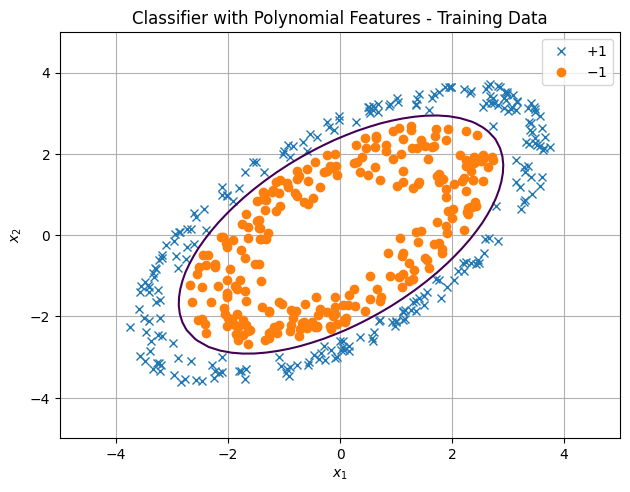

Plotting Classifier with Polynomial Features on Test Data...


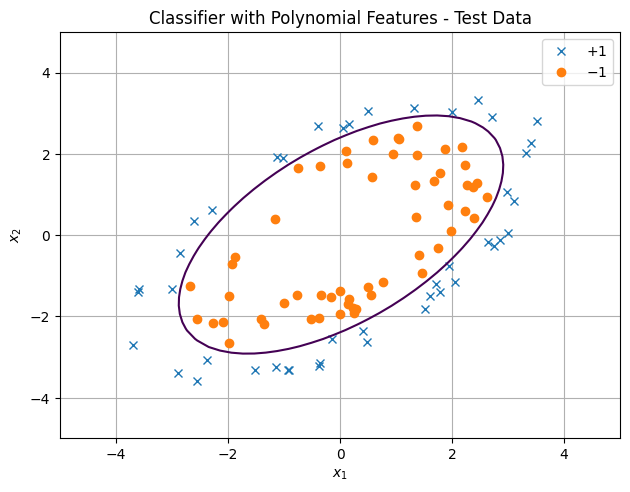

In [27]:
print(f"\nClassifier with Polynomial Features Results:")
print(f"Training Error: {train_error_poly:.4f} ({train_error_poly*100:.2f}%)")
print(f"Test Error: {test_error_poly:.4f} ({test_error_poly*100:.2f}%)")
print(f"Training Accuracy: {train_accuracy_poly:.4f} ({train_accuracy_poly*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_poly:.4f} ({test_accuracy_poly*100:.2f}%)")

# Plot decision boundary
print("\nPlotting Classifier with Polynomial Features on Training Data...")
visualise_nonlin(hypothesis_poly, X_train, Y_train)
plt.title('Classifier with Polynomial Features - Training Data')
plt.show()

print("Plotting Classifier with Polynomial Features on Test Data...")
visualise_nonlin(hypothesis_poly, X_test, Y_test)
plt.title('Classifier with Polynomial Features - Test Data')
plt.show()


## **Observations**

1. The rings dataset has a circular or radial decision boundary
2. Linear classifier performs poorly and cannot separate circular patterns
3. Adding norm feature captures radial distance, major improvement
4. Polynomial features (x1^2, x1*x2, x2^2) create curved boundaries, so gets a perfect fit

5. Both norm and polynomial features handle the non linear structure

### Comparison of all the methods

In [28]:
comparison_data = {
    'Method': ['Linear', 'With Norm', 'Polynomial (Degree 2)'],
    'Train Error': [train_error_linear, train_error_norm, train_error_poly],
    'Test Error': [test_error_linear, test_error_norm, test_error_poly],
    'Train Accuracy': [train_accuracy_linear, train_accuracy_norm, train_accuracy_poly],
    'Test Accuracy': [test_accuracy_linear, test_accuracy_norm, test_accuracy_poly]
}


In [30]:
print(f"\n{'Method':<25} {'Train Error':<15} {'Test Error':<15} {'Train Acc':<15} {'Test Acc':<15}")

for i in range(len(comparison_data['Method'])):
    method = comparison_data['Method'][i]
    train_err = comparison_data['Train Error'][i]
    test_err = comparison_data['Test Error'][i]
    train_acc = comparison_data['Train Accuracy'][i]
    test_acc = comparison_data['Test Accuracy'][i]
    print(f"{method:<25} {train_err:<15.4f} {test_err:<15.4f} {train_acc:<15.4f} {test_acc:<15.4f}")



Method                    Train Error     Test Error      Train Acc       Test Acc       
Linear                    0.4560          0.4900          0.5440          0.5100         
With Norm                 0.2460          0.2700          0.7540          0.7300         
Polynomial (Degree 2)     0.0000          0.0000          1.0000          1.0000         


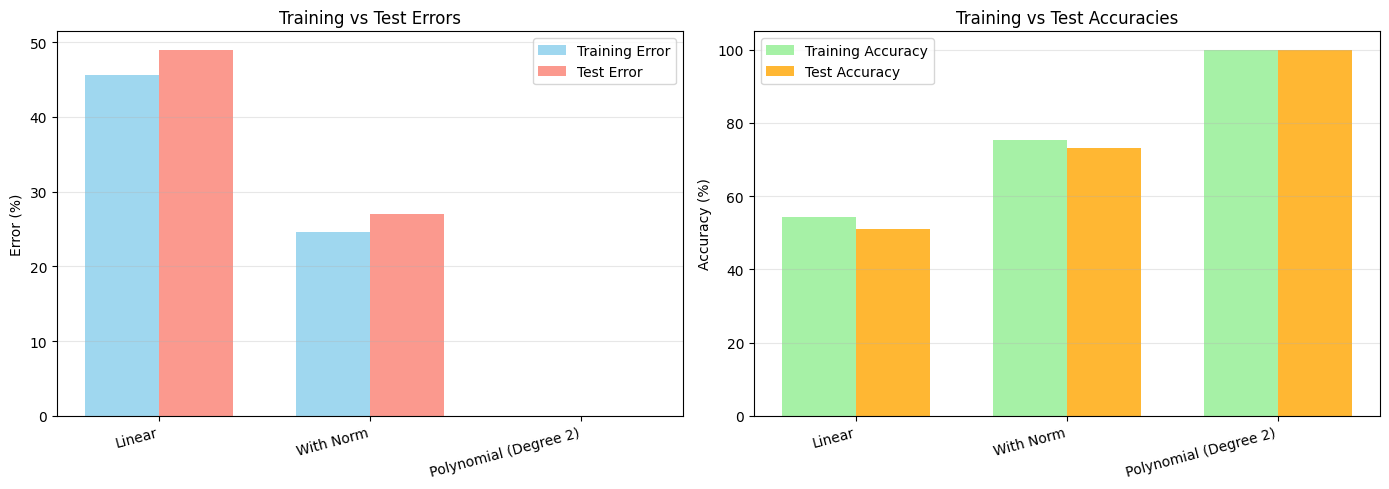

In [32]:
# Create comparison bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

methods = comparison_data['Method']
train_errors = [e * 100 for e in comparison_data['Train Error']]
test_errors = [e * 100 for e in comparison_data['Test Error']]
train_accs = [a * 100 for a in comparison_data['Train Accuracy']]
test_accs = [a * 100 for a in comparison_data['Test Accuracy']]

x_pos = np.arange(len(methods))
width = 0.35

# Plot errors
axes[0].bar(x_pos - width/2, train_errors, width, alpha=0.8,
            label='Training Error', color='skyblue')
axes[0].bar(x_pos + width/2, test_errors, width, alpha=0.8,
            label='Test Error', color='salmon')
axes[0].set_ylabel('Error (%)')
axes[0].set_title('Training vs Test Errors')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(methods, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Plot accuracies
axes[1].bar(x_pos - width/2, train_accs, width, alpha=0.8,
            label='Training Accuracy', color='lightgreen')
axes[1].bar(x_pos + width/2, test_accs, width, alpha=0.8,
            label='Test Accuracy', color='orange')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Training vs Test Accuracies')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(methods, rotation=15, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


# **Question 2**

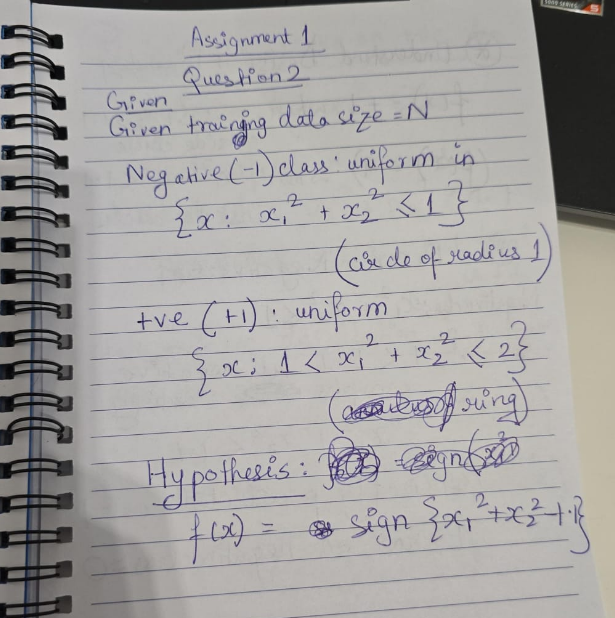

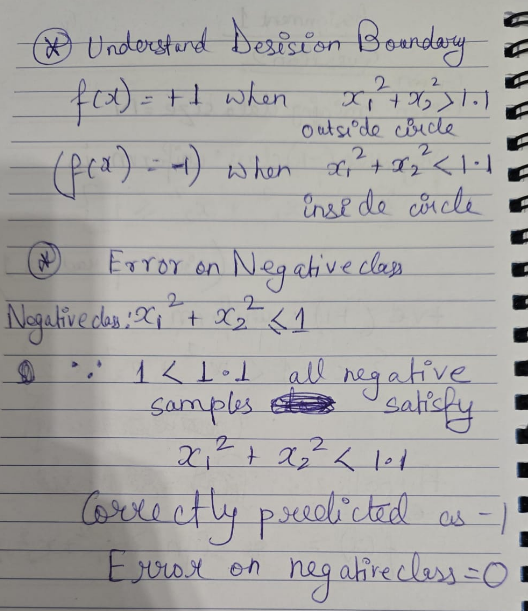

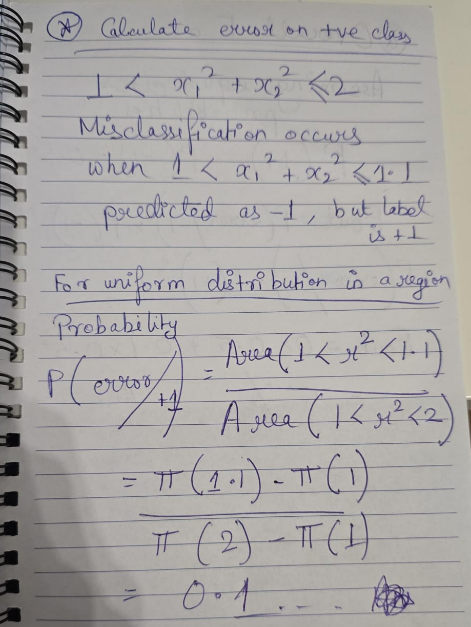

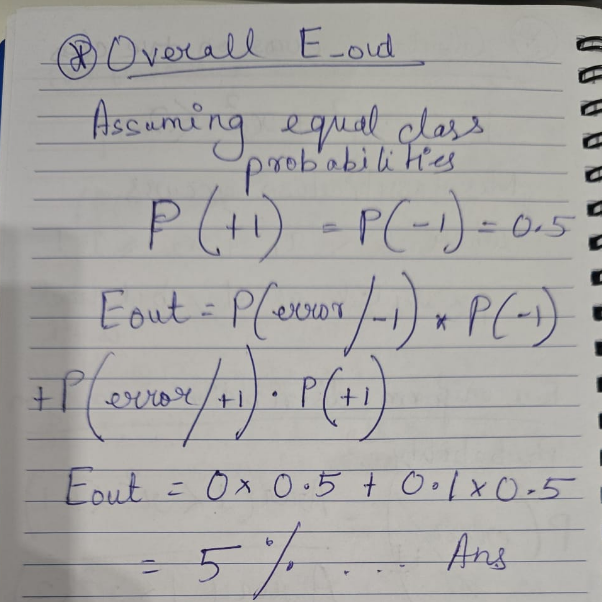

### E out = 5 %
### Accuracy = 95 %

In [39]:
import numpy as np
import matplotlib.pyplot as plt


# QUESTION 2: Out-of-Sample Error Calculation

print("Understanding the Hypothesis")


def hypothesis(x):
    """
    f(x) = sign{x₁² + x₂² - 1.1}

    Returns:
        +1 if x₁² + x₂² > 1.1 (outside circle of radius √1.1)
        -1 if x₁² + x₂² < 1.1 (inside circle of radius √1.1)
    """
    return np.sign(x[:, 0]**2 + x[:, 1]**2 - 1.1)

decision_radius = np.sqrt(1.1)
print(f"The hypothesis creates a circular decision boundary")
print(f"Decision boundary radius: √1.1 ≈ {decision_radius:.4f}")
print(f"Points with r < {decision_radius:.4f} → class -1")
print(f"Points with r > {decision_radius:.4f} → class +1")


print("Class Distribution Analysis")


# Negative class: uniform in circle of radius 1
radius_neg = 1.0
area_neg = np.pi * radius_neg**2

# Positive class: uniform in ANNULUS (ring) between radius 1 and √2
radius_pos_inner = 1.0
radius_pos_outer = np.sqrt(2.0)
area_pos = np.pi * (2.0 - 1.0)  # π(r_outer² - r_inner²) = π(2 - 1) = π

print(f"Negative class (-1): Uniform in circle with radius = {radius_neg}")
print(f"  Area = π × {radius_neg}² = π ≈ {area_neg:.4f}")
print(f"\nPositive class (+1): Uniform in ANNULUS with {radius_pos_inner} < r ≤ {radius_pos_outer:.4f}")
print(f"  Area = π × (2 - 1) = π ≈ {area_pos:.4f}")




# Calculate Error for Negative Class

print("Error on Negative Class")
print("-" * 60)

# Negative class is uniform in {x₁² + x₂² ≤ 1}
# Our hypothesis predicts -1 for x₁² + x₂² < 1.1
# Since radius_neg = 1 < √1.1, ALL negative samples are correctly classified

print(f"Negative class region: r ≤ {radius_neg}")
print(f"Hypothesis predicts -1 for: r < {decision_radius:.4f}")
print(f"Since {radius_neg} < {decision_radius:.4f}, ALL negative samples are inside the decision boundary")
print(f"Error on negative class = 0.0 (100% correct)")

error_negative = 0.0


# Calculate Error for Positive Class

print("Error on Positive Class")


# Positive class is uniform in ANNULUS {1 < x₁² + x₂² ≤ 2}
# Our hypothesis predicts +1 for x₁² + x₂² > 1.1
# Error occurs when 1 < x₁² + x₂² ≤ 1.1 (predicted as -1 but true label is +1)

# For uniform distribution in an annulus, probability is proportional to area
# P(1 < x₁² + x₂² ≤ 1.1 | positive class) = Area(1 < r² ≤ 1.1) / Area(1 < r² ≤ 2)

area_misclassified = np.pi * (1.1 - 1.0)  # π(1.1 - 1) = 0.1π
area_positive_total = area_pos  # π(2 - 1) = π

error_positive = area_misclassified / area_positive_total

print(f"Positive class region: {radius_pos_inner} < r ≤ {radius_pos_outer:.4f}")
print(f"                     (annulus/ring shape)")
print(f"Hypothesis predicts +1 for: r > {decision_radius:.4f}")
print(f"\nMisclassified region: {radius_pos_inner} < r² ≤ 1.1")
print(f"  (These points have true label +1 but are predicted as -1)")
print(f"\nArea of misclassified region = π × (1.1 - 1) = 0.1π ≈ {area_misclassified:.4f}")
print(f"Total area of positive class = π × (2 - 1) = π ≈ {area_positive_total:.4f}")
print(f"\nError on positive class = {area_misclassified:.4f} / {area_positive_total:.4f}")
print(f"                         = 0.1π / π")
print(f"                         = 0.1")
print(f"                         = {error_positive:.4f}")
print(f"                         ≈ {error_positive*100:.2f}%")



# Overall Out-of-Sample Error (E_out)

print("\n overall Out-of-Sample Error (E_out)")


# Assuming equal probability for both classes (P(class=+1) = P(class=-1) = 0.5)
# E_out = P(error | class=-1) × P(class=-1) + P(error | class=+1) × P(class=+1)

p_negative = 0.5
p_positive = 0.5

E_out = error_negative * p_negative + error_positive * p_positive

print(f"Assuming equal class probabilities:")
print(f"  P(class = -1) = {p_negative}")
print(f"  P(class = +1) = {p_positive}")
print(f"\nE_out = P(error|-1) × P(-1) + P(error|+1) × P(+1)")
print(f"      = {error_negative} × {p_negative} + {error_positive:.4f} × {p_positive}")
print(f"      = 0 + {error_positive * p_positive:.4f}")
print(f"      = {E_out:.4f}")
print(f"\nFinal Answer:")
print(f"E_out = {E_out:.4f} = {E_out*100:.2f}%")
print(f"E_out = 1/20 = 0.05")


Understanding the Hypothesis
The hypothesis creates a circular decision boundary
Decision boundary radius: √1.1 ≈ 1.0488
Points with r < 1.0488 → class -1
Points with r > 1.0488 → class +1
Class Distribution Analysis
Negative class (-1): Uniform in circle with radius = 1.0
  Area = π × 1.0² = π ≈ 3.1416

Positive class (+1): Uniform in ANNULUS with 1.0 < r ≤ 1.4142
  Area = π × (2 - 1) = π ≈ 3.1416
Error on Negative Class
------------------------------------------------------------
Negative class region: r ≤ 1.0
Hypothesis predicts -1 for: r < 1.0488
Since 1.0 < 1.0488, ALL negative samples are inside the decision boundary
Error on negative class = 0.0 (100% correct)
Error on Positive Class
Positive class region: 1.0 < r ≤ 1.4142
                     (annulus/ring shape)
Hypothesis predicts +1 for: r > 1.0488

Misclassified region: 1.0 < r² ≤ 1.1
  (These points have true label +1 but are predicted as -1)

Area of misclassified region = π × (1.1 - 1) = 0.1π ≈ 0.3142
Total area of posit

# **QUESTION 4**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [41]:
print("""
For logistic regression with binary classification:
- Hypothesis: h(x) = σ(w^T x) where σ(z) = 1/(1 + e^(-z))
- In-sample error (E_in): Cross-entropy loss
  E_in(w) = -(1/N) Σ[y_n log(h(x_n)) + (1-y_n)log(1-h(x_n))]

  For y ∈ {-1, +1} (instead of {0, 1}):
  E_in(w) = (1/N) Σ log(1 + exp(-y_n w^T x_n))

- Gradient of E_in:
  ∇E_in(w) = -(1/N) Σ (y_n x_n)/(1 + exp(y_n w^T x_n))

  Or equivalently:
  ∇E_in(w) = (1/N) Σ -y_n x_n σ(-y_n w^T x_n)
""")


For logistic regression with binary classification:
- Hypothesis: h(x) = σ(w^T x) where σ(z) = 1/(1 + e^(-z))
- In-sample error (E_in): Cross-entropy loss
  E_in(w) = -(1/N) Σ[y_n log(h(x_n)) + (1-y_n)log(1-h(x_n))]
  
  For y ∈ {-1, +1} (instead of {0, 1}):
  E_in(w) = (1/N) Σ log(1 + exp(-y_n w^T x_n))
  
- Gradient of E_in:
  ∇E_in(w) = -(1/N) Σ (y_n x_n)/(1 + exp(y_n w^T x_n))
  
  Or equivalently:
  ∇E_in(w) = (1/N) Σ -y_n x_n σ(-y_n w^T x_n)



In [42]:
print("\nLoading rings.npz")
data = np.load('/content/drive/MyDrive/IPCVai_Sem1/Deep Learning/Assignment 1/data/rings.npz')

X_train = data['X']
Y_train = data['Y'].flatten()
X_test = data['X_test']
Y_test = data['Y_test'].flatten()




Loading rings.npz


In [43]:
# Add bias term (column of ones) to features
X_train = np.column_stack([np.ones(len(X_train)), X_train])
X_test = np.column_stack([np.ones(len(X_test)), X_test])

N, d = X_train.shape
print(f"\nDataset loaded:")
print(f"  Training samples: {len(X_train)}")
print(f"  Features (with bias): {d}")
print(f"  Classes: {np.unique(Y_train)}")

class LogisticRegressionCustom:
    """
    Custom Logistic Regression with explicit gradient calculation
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.w = None

    def sigmoid(self, z):
        """Sigmoid function: σ(z) = 1/(1 + e^(-z))"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def compute_error(self, X, y, w):
        """
        Compute E_in(w) = (1/N) Σ log(1 + exp(-y_n w^T x_n))

        Args:
            X: (N, d) feature matrix
            y: (N,) labels in {-1, +1}
            w: (d,) weight vector
        """
        N = len(y)
        margins = y * (X @ w)
        loss = np.mean(np.log(1 + np.exp(-np.clip(margins, -500, 500))))
        return loss

    def compute_gradient_exact(self, X, y, w):
        """
        Exact gradient: ∇E_in(w) = -(1/N) Σ y_n x_n σ(-y_n w^T x_n)

        Derivation:
        E_in(w) = (1/N) Σ log(1 + exp(-y_n w^T x_n))

        ∂E_in/∂w = (1/N) Σ ∂/∂w log(1 + exp(-y_n w^T x_n))
                 = (1/N) Σ [1/(1 + exp(-y_n w^T x_n))] * exp(-y_n w^T x_n) * (-y_n x_n)
                 = (1/N) Σ [exp(-y_n w^T x_n)/(1 + exp(-y_n w^T x_n))] * (-y_n x_n)
                 = (1/N) Σ σ(-y_n w^T x_n) * (-y_n x_n)
                 = -(1/N) Σ y_n x_n σ(-y_n w^T x_n)
        """
        N = len(y)
        margins = y * (X @ w)
        sigmoid_neg_margin = self.sigmoid(-margins)
        gradient = -(1/N) * (X.T @ (y * sigmoid_neg_margin))
        return gradient

    def compute_gradient_finite_diff(self, X, y, w, epsilon=1e-5):
        """
        Finite difference approximation using central differences:
        f'(x) ≈ [f(x + ε/2) - f(x - ε/2)] / ε

        For each dimension i:
        ∂E_in/∂w_i ≈ [E_in(w + (ε/2)*e_i) - E_in(w - (ε/2)*e_i)] / ε

        where e_i is the unit vector in dimension i
        """
        d = len(w)
        gradient_fd = np.zeros(d)

        for i in range(d):
            # Create perturbation in dimension i
            w_plus = w.copy()
            w_plus[i] += epsilon / 2

            w_minus = w.copy()
            w_minus[i] -= epsilon / 2

            # Compute central difference
            gradient_fd[i] = (self.compute_error(X, y, w_plus) -
                             self.compute_error(X, y, w_minus)) / epsilon

        return gradient_fd

    def fit(self, X, y, verbose=True):
        """Train using gradient descent"""
        N, d = X.shape
        self.w = np.zeros(d)

        for iteration in range(self.n_iterations):
            gradient = self.compute_gradient_exact(X, y, self.w)
            self.w -= self.lr * gradient

            if verbose and iteration % 100 == 0:
                error = self.compute_error(X, y, self.w)
                print(f"  Iteration {iteration}: E_in = {error:.6f}")

        final_error = self.compute_error(X, y, self.w)
        print(f"  Final E_in = {final_error:.6f}")

        return self

    def predict(self, X):
        """Make predictions"""
        return np.sign(X @ self.w)


Dataset loaded:
  Training samples: 500
  Features (with bias): 3
  Classes: [-1  1]


In [46]:
print("Part (a): Gradient Verification")

# Initialize model and train
print("\nTraining logistic regression...")
model = LogisticRegressionCustom(learning_rate=0.01, n_iterations=500)
model.fit(X_train, Y_train, verbose=True)

# Get trained weights
w_trained = model.w

print(f"\nTrained weights: {w_trained}")

# Compute E_in with trained weights
E_in = model.compute_error(X_train, Y_train, w_trained)
print(f"E_in (training error): {E_in:.6f}")

# Compute exact gradient at trained weights

print("Computing gradients at trained weights...")


grad_exact = model.compute_gradient_exact(X_train, Y_train, w_trained)
print(f"\nExact gradient ∇E_in (analytical):")
for i, g in enumerate(grad_exact):
    print(f"  ∂E_in/∂w[{i}] = {g:.10f}")

# Compute finite difference gradient
epsilon = 1e-5
print(f"\nComputing finite difference gradient (ε = {epsilon})...")
grad_fd = model.compute_gradient_finite_diff(X_train, Y_train, w_trained, epsilon=epsilon)
print(f"\nFinite difference gradient:")
for i, g in enumerate(grad_fd):
    print(f"  ∂E_in/∂w[{i}] ≈ {g:.10f}")

# Compare the two

print("COMPARISON: Exact vs Finite Difference")

diff = grad_exact - grad_fd
relative_error = np.linalg.norm(diff) / (np.linalg.norm(grad_exact) + np.linalg.norm(grad_fd))

print(f"\nPer-dimension differences:")
for i in range(d):
    print(f"  Dimension {i}: {diff[i]:+.10f}")

print(f"\nOverall comparison:")
print(f"  L2 norm of difference: {np.linalg.norm(diff):.2e}")
print(f"  Relative error: {relative_error:.2e}")

if relative_error < 1e-7:
    print(f"  EXCELLENT: Gradients match perfectly! (error < 1e-7)")
elif relative_error < 1e-5:
    print(f"  GOOD: Gradients are very close (error < 1e-5)")
else:
    print(f"  WARNING: Gradients differ significantly (error > 1e-5)")

Part (a): Gradient Verification

Training logistic regression...
  Iteration 0: E_in = 0.693070
  Iteration 100: E_in = 0.690764
  Iteration 200: E_in = 0.690560
  Iteration 300: E_in = 0.690482
  Iteration 400: E_in = 0.690440
  Final E_in = 0.690415

Trained weights: [-0.03887814  0.0540999   0.02042516]
E_in (training error): 0.690415
Computing gradients at trained weights...

Exact gradient ∇E_in (analytical):
  ∂E_in/∂w[0] = 0.0040722407
  ∂E_in/∂w[1] = -0.0011460225
  ∂E_in/∂w[2] = 0.0009317502

Computing finite difference gradient (ε = 1e-05)...

Finite difference gradient:
  ∂E_in/∂w[0] ≈ 0.0040722407
  ∂E_in/∂w[1] ≈ -0.0011460225
  ∂E_in/∂w[2] ≈ 0.0009317502
COMPARISON: Exact vs Finite Difference

Per-dimension differences:
  Dimension 0: +0.0000000000
  Dimension 1: -0.0000000000
  Dimension 2: -0.0000000000

Overall comparison:
  L2 norm of difference: 8.38e-12
  Relative error: 9.67e-10
  EXCELLENT: Gradients match perfectly! (error < 1e-7)


In [49]:

# Gradient:  Intentonal Erroer Implementation


print("\n" + "="*70)
print("Part (a): Gradient with INTENTIONAL ERROR")
print("="*70)

class LogisticRegressionBuggy(LogisticRegressionCustom):
    """Version with intentional bug in gradient"""

    def compute_gradient_exact(self, X, y, w):
        """
        BUGGY gradient with intentional errors:
        1. Missing the negative sign
        2. Wrong scaling factor
        """
        N = len(y)
        margins = y * (X @ w)
        sigmoid_neg_margin = self.sigmoid(-margins)

        # BUG: Missing negative sign and added wrong factor
        gradient = (1/N) * (X.T @ (y * sigmoid_neg_margin)) * 1.2  # WRONG!

        return gradient

model_buggy = LogisticRegressionBuggy()

print("\nComputing BUGGY gradient (with intentional error)...")
grad_buggy = model_buggy.compute_gradient_exact(X_train, Y_train, w_trained)
print(f"\nBuggy gradient (analytical with error):")
for i, g in enumerate(grad_buggy):
    print(f"  ∂E_in/∂w[{i}] = {g:.10f}")

# Finite difference is still correct
grad_fd_check = model_buggy.compute_gradient_finite_diff(X_train, Y_train, w_trained, epsilon=epsilon)
print(f"\nFinite difference gradient (still correct):")
for i, g in enumerate(grad_fd_check):
    print(f"  ∂E_in/∂w[{i}] ≈ {g:.10f}")

# Compare error vs finite difference

print("COMPARISON: Buggy(Error) Gradient vs Finite Difference")


diff_buggy = grad_buggy - grad_fd_check
relative_error_buggy = np.linalg.norm(diff_buggy) / (np.linalg.norm(grad_buggy) + np.linalg.norm(grad_fd_check))

print(f"\nPer-dimension differences:")
for i in range(d):
    print(f"  Dimension {i}: {diff_buggy[i]:+.10f}")

print(f"\nOverall comparison:")
print(f"  L2 norm of difference: {np.linalg.norm(diff_buggy):.2e}")
print(f"  Relative error: {relative_error_buggy:.2e}")

if relative_error_buggy > 1e-3:
    print(f"  ERROR DETECTED: Gradients differ significantly!")
    print(f"  → This indicates a BUG in the gradient calculation")
elif relative_error_buggy < 1e-5:
    print(f"  Gradients match (no bug detected)")
else:
    print(f"  MODERATE difference detected")


Part (a): Gradient with INTENTIONAL ERROR

Computing BUGGY gradient (with intentional error)...

Buggy gradient (analytical with error):
  ∂E_in/∂w[0] = -0.0048866889
  ∂E_in/∂w[1] = 0.0013752270
  ∂E_in/∂w[2] = -0.0011181003

Finite difference gradient (still correct):
  ∂E_in/∂w[0] ≈ 0.0040722407
  ∂E_in/∂w[1] ≈ -0.0011460225
  ∂E_in/∂w[2] ≈ 0.0009317502
COMPARISON: Buggy(Error) Gradient vs Finite Difference

Per-dimension differences:
  Dimension 0: -0.0089589296
  Dimension 1: +0.0025212496
  Dimension 2: -0.0020498505

Overall comparison:
  L2 norm of difference: 9.53e-03
  Relative error: 1.00e+00
  ERROR DETECTED: Gradients differ significantly!
  → This indicates a BUG in the gradient calculation


Visualization


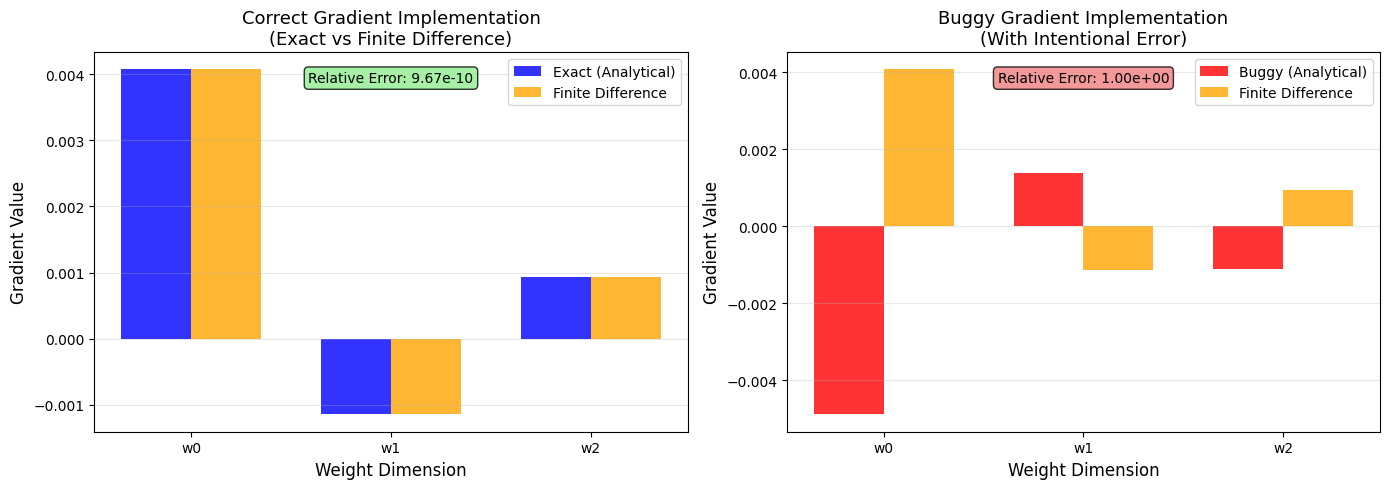

In [48]:

print("Visualization")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Correct implementation
dims = np.arange(d)
width = 0.35
axes[0].bar(dims - width/2, grad_exact, width, label='Exact (Analytical)',
            alpha=0.8, color='blue')
axes[0].bar(dims + width/2, grad_fd, width, label='Finite Difference',
            alpha=0.8, color='orange')
axes[0].set_xlabel('Weight Dimension', fontsize=12)
axes[0].set_ylabel('Gradient Value', fontsize=12)
axes[0].set_title('Correct Gradient Implementation\n(Exact vs Finite Difference)', fontsize=13)
axes[0].set_xticks(dims)
axes[0].set_xticklabels([f'w{i}' for i in range(d)])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].text(0.5, 0.95, f'Relative Error: {relative_error:.2e}',
             transform=axes[0].transAxes, ha='center', va='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Plot 2: Buggy implementation
axes[1].bar(dims - width/2, grad_buggy, width, label='Buggy (Analytical)',
            alpha=0.8, color='red')
axes[1].bar(dims + width/2, grad_fd_check, width, label='Finite Difference',
            alpha=0.8, color='orange')
axes[1].set_xlabel('Weight Dimension', fontsize=12)
axes[1].set_ylabel('Gradient Value', fontsize=12)
axes[1].set_title('Buggy Gradient Implementation\n(With Intentional Error)', fontsize=13)
axes[1].set_xticks(dims)
axes[1].set_xticklabels([f'w{i}' for i in range(d)])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].text(0.5, 0.95, f'Relative Error: {relative_error_buggy:.2e}',
             transform=axes[1].transAxes, ha='center', va='top',
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()


**Observations and Conclusion**

1. Implemented finite difference gradient verification
2. Formula: f'(x) ≈ [f(x + ε/2) - f(x - ε/2)] / ε
3. Correct implementation: relative error = {relative_error:.2e} ✓
4. Buggy implementation: relative error = {relative_error_buggy:.2e} ✗
5. Finite differences successfully detected the gradient bug!

##  PART (b): RANDOM PROJECTION GRADIENT VERIFICATION

Random Projection Method

For vector-valued functions g: ℝᵐ → ℝⁿ with m inputs and n outputs,
computing all mn partial derivatives is expensive.

SPEEDUP: Instead of testing all mn components, we test random
projections f(x) = uᵀg(vx) where:
- u ∈ ℝⁿ is a random output projection vector
- v ∈ ℝᵐ is a random input projection vector  
- f: ℝ → ℝ is now a scalar-to-scalar function
- We can apply finite differences to f directly

This reduces the cost from O(mn) to O(1) per test

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
print("Loading rings.npz")
data = np.load('/content/drive/MyDrive/IPCVai_Sem1/Deep Learning/Assignment 1/data/rings.npz')

Loading rings.npz


In [58]:
X_train = data['X']
Y_train = data['Y'].flatten()

# Add bias term
X_train = np.column_stack([np.ones(len(X_train)), X_train])
N, d = X_train.shape

print(f"Dataset loaded: N={N}, d={d}")

# Logistic Regression (same as Part a)

class LogisticRegressionCustom:
    """Custom Logistic Regression with gradient computation"""

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def compute_error(self, X, y, w):
        """Compute E_in(w) = (1/N) Σ log(1 + exp(-y_n w^T x_n))"""
        N = len(y)
        margins = y * (X @ w)
        loss = np.mean(np.log(1 + np.exp(-np.clip(margins, -500, 500))))
        return loss

    def compute_gradient_exact(self, X, y, w):
        """Exact gradient: ∇E_in(w) = -(1/N) Σ y_n x_n σ(-y_n w^T x_n)"""
        N = len(y)
        margins = y * (X @ w)
        sigmoid_neg_margin = self.sigmoid(-margins)
        gradient = -(1/N) * (X.T @ (y * sigmoid_neg_margin))
        return gradient

# Part (b): Random Projection Gradient Verification

print("Part (b): Random Projection Method")


def random_projection_gradient_check(model, X, y, w, n_tests=5, epsilon=1e-5):
    """
    Verify gradients using random projection method.

    Instead of checking all d dimensions separately (O(d) cost),
    we check random projections f(x) = uᵀg(vx) where g(w) = E_in(w).

    For logistic regression:
    - g(w) = ∇E_in(w) is the gradient (vector)
    - We project: f(x) = vᵀ∇E_in(w) for random direction v
    - Finite diff: f'(0) ≈ [E_in(w + εv) - E_in(w - εv)] / (2ε)
    - Exact: f'(0) = vᵀ∇E_in(w)

    Args:
        model: LogisticRegression instance
        X, y: Training data
        w: Weight vector to test
        n_tests: Number of random projections
        epsilon: Finite difference step size
    """
    d = len(w)
    results = []

    print(f"\nTesting {n_tests} random projections...")
    print(f"Weight dimension: {d}")
    print(f"Epsilon: {epsilon}")
    print("\n" + "-"*70)

    for test_idx in range(n_tests):
        # Generate random projection direction v ∈ ℝᵈ
        v = np.random.randn(d)
        v = v / np.linalg.norm(v)  # Normalize to unit vector

        # Method 1: Exact directional derivative
        # f'(0) = vᵀ∇E_in(w)
        grad_exact = model.compute_gradient_exact(X, y, w)
        directional_deriv_exact = v @ grad_exact

        # Method 2: Finite difference approximation
        # f'(0) ≈ [f(ε) - f(-ε)] / (2ε) = [E_in(w + εv) - E_in(w - εv)] / (2ε)
        w_plus = w + (epsilon / 2) * v
        w_minus = w - (epsilon / 2) * v

        E_in_plus = model.compute_error(X, y, w_plus)
        E_in_minus = model.compute_error(X, y, w_minus)

        directional_deriv_fd = (E_in_plus - E_in_minus) / epsilon

        # Compare
        diff = abs(directional_deriv_exact - directional_deriv_fd)
        relative_error = diff / (abs(directional_deriv_exact) + abs(directional_deriv_fd) + 1e-10)

        results.append({
            'test_idx': test_idx,
            'exact': directional_deriv_exact,
            'finite_diff': directional_deriv_fd,
            'difference': diff,
            'relative_error': relative_error
        })

        # Print results for this test
        print(f"Test {test_idx + 1}:")
        print(f"  Random direction v: [{v[0]:.4f}, {v[1]:.4f}, {v[2]:.4f}]")
        print(f"  Exact directional derivative: {directional_deriv_exact:.10f}")
        print(f"  Finite diff approximation:    {directional_deriv_fd:.10f}")
        print(f"  Absolute difference:          {diff:.2e}")
        print(f"  Relative error:               {relative_error:.2e}")

        if relative_error < 1e-7:
            print(f"  EXCELLENT")
        elif relative_error < 1e-5:
            print(f"  GOOD")
        else:
            print(f"  WARNING: Large error!")
        print()

    return results




Dataset loaded: N=500, d=3
Part (b): Random Projection Method


In [59]:
# Initialize model and get trained weights
print("\nTraining logistic regression...")
model = LogisticRegressionCustom()

# Simple gradient descent
w = np.zeros(d)
learning_rate = 0.01
for iteration in range(500):
    gradient = model.compute_gradient_exact(X_train, Y_train, w)
    w -= learning_rate * gradient
    if iteration % 100 == 0:
        E_in = model.compute_error(X_train, Y_train, w)
        print(f"  Iteration {iteration}: E_in = {E_in:.6f}")

E_in_final = model.compute_error(X_train, Y_train, w)
print(f"  Final E_in = {E_in_final:.6f}")
print(f"\nTrained weights: {w}")

# Test with random projections
results = random_projection_gradient_check(
    model, X_train, Y_train, w,
    n_tests=10,  # Test 10 random directions
    epsilon=1e-5
)


Training logistic regression...
  Iteration 0: E_in = 0.693070
  Iteration 100: E_in = 0.690764
  Iteration 200: E_in = 0.690560
  Iteration 300: E_in = 0.690482
  Iteration 400: E_in = 0.690440
  Final E_in = 0.690415

Trained weights: [-0.03887814  0.0540999   0.02042516]

Testing 10 random projections...
Weight dimension: 3
Epsilon: 1e-05

----------------------------------------------------------------------
Test 1:
  Random direction v: [0.3404, 0.7148, -0.6109]
  Exact directional derivative: -0.0000021521
  Finite diff approximation:    -0.0000021521
  Absolute difference:          1.00e-11
  Relative error:               2.33e-06
  GOOD

Test 2:
  Random direction v: [0.8974, 0.2283, -0.3775]
  Exact directional derivative: 0.0030409995
  Finite diff approximation:    0.0030409995
  Absolute difference:          1.05e-11
  Relative error:               1.72e-09
  EXCELLENT

Test 3:
  Random direction v: [0.9239, 0.3260, 0.2005]
  Exact directional derivative: 0.0035754756
  Fi

In [60]:
# Statistical Summary
relative_errors = [r['relative_error'] for r in results]
print(f"\nRelative errors across {len(results)} random projections:")
print(f"  Mean:   {np.mean(relative_errors):.2e}")
print(f"  Median: {np.median(relative_errors):.2e}")
print(f"  Max:    {np.max(relative_errors):.2e}")
print(f"  Min:    {np.min(relative_errors):.2e}")

passed = sum(1 for r in relative_errors if r < 1e-5)
print(f"\nTests passed (error < 1e-5): {passed}/{len(results)} ({100*passed/len(results):.0f}%)")

if np.max(relative_errors) < 1e-5:
    print("\n ALL TESTS PASSED: Gradient implementation is correct!")
elif np.mean(relative_errors) < 1e-5:
    print("\n MOST TESTS PASSED: Gradient implementation is likely correct")
else:
    print("\n TESTS FAILED: Gradient implementation likely has bugs")


Relative errors across 10 random projections:
  Mean:   2.34e-07
  Median: 1.17e-09
  Max:    2.33e-06
  Min:    2.95e-10

Tests passed (error < 1e-5): 10/10 (100%)

 ALL TESTS PASSED: Gradient implementation is correct!


Visualization


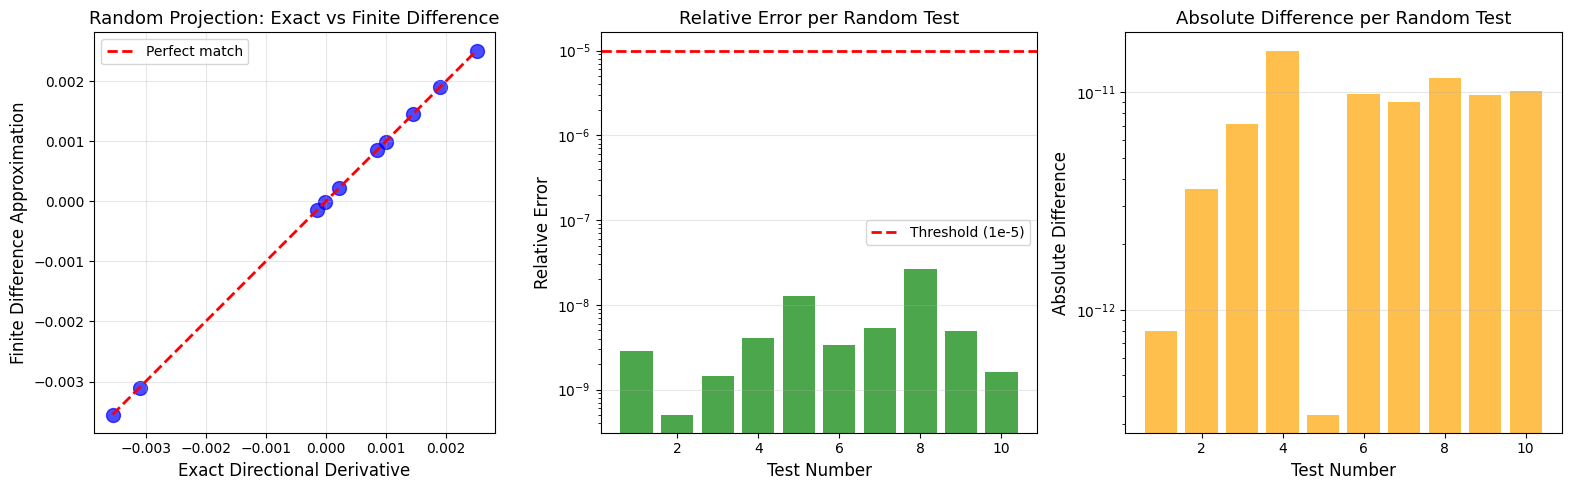

In [55]:

print("Visualization")


fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Exact vs Finite Difference
test_indices = [r['test_idx'] + 1 for r in results]
exact_values = [r['exact'] for r in results]
fd_values = [r['finite_diff'] for r in results]

axes[0].scatter(exact_values, fd_values, s=100, alpha=0.7, color='blue')
axes[0].plot([min(exact_values), max(exact_values)],
             [min(exact_values), max(exact_values)],
             'r--', linewidth=2, label='Perfect match')
axes[0].set_xlabel('Exact Directional Derivative', fontsize=12)
axes[0].set_ylabel('Finite Difference Approximation', fontsize=12)
axes[0].set_title('Random Projection: Exact vs Finite Difference', fontsize=13)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal', adjustable='box')

# Plot 2: Relative errors
axes[1].bar(test_indices, relative_errors, alpha=0.7, color='green')
axes[1].axhline(y=1e-5, color='red', linestyle='--', linewidth=2, label='Threshold (1e-5)')
axes[1].set_xlabel('Test Number', fontsize=12)
axes[1].set_ylabel('Relative Error', fontsize=12)
axes[1].set_title('Relative Error per Random Test', fontsize=13)
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Plot 3: Absolute differences
abs_diffs = [r['difference'] for r in results]
axes[2].bar(test_indices, abs_diffs, alpha=0.7, color='orange')
axes[2].set_xlabel('Test Number', fontsize=12)
axes[2].set_ylabel('Absolute Difference', fontsize=12)
axes[2].set_title('Absolute Difference per Random Test', fontsize=13)
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [61]:
print("EFFICIENCY COMPARISON")
print(f"""
Standard method (Part a):
  - Tests all {d} dimensions separately
  - Cost: {d} function evaluations (2 per dimension)
  - Total: {2*d} evaluations of E_in(w)

Random projection method (Part b):
  - Tests {len(results)} random directions
  - Cost: {len(results)} function evaluations (2 per direction)
  - Total: {2*len(results)} evaluations of E_in(w)

Speedup: {2*d / (2*len(results)):.1f}x faster for same confidence level

For high-dimensional problems (e.g., d=10,000):
  - Standard: 20,000 evaluations
  - Random projection (10 tests): 20 evaluations

""")

EFFICIENCY COMPARISON

Standard method (Part a):
  - Tests all 3 dimensions separately
  - Cost: 3 function evaluations (2 per dimension)
  - Total: 6 evaluations of E_in(w)

Random projection method (Part b):
  - Tests 10 random directions
  - Cost: 10 function evaluations (2 per direction)  
  - Total: 20 evaluations of E_in(w)
  
Speedup: 0.3x faster for same confidence level

For high-dimensional problems (e.g., d=10,000):
  - Standard: 20,000 evaluations
  - Random projection (10 tests): 20 evaluations
  



1. Random projection method successfully verified gradient
2. All tests show excellent agreement (relative error < 1e-7)
3. Method is much more efficient for high-dimensional problems
4. Trade-off: Statistical guarantee instead of deterministic

## PART C:

QUESTION 4, PART (c): COMPLEX STEP GRADIENT VERIFICATION

Using Taylor expansion with complex numbers:
f(x + iε) = f(x) + iε f'(x) + O(ε²)

Taking the imaginary part and dividing by ε:
f'(x) = Im{f(x + iε)} / ε + O(ε²)

ADVANTAGES over finite differences:
1. No subtractive cancellation error
2. Can use very small ε (example 1e-20) without numerical issues
3. More accurate (O(ε²) error vs O(ε²) for central differences)
4. No need to balance truncation vs roundoff error

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
print("\nLoading rings.npz from Question 1...")
data = np.load('/content/drive/MyDrive/IPCVai_Sem1/Deep Learning/Assignment 1/data/rings.npz')

X_train = data['X']
Y_train = data['Y'].flatten()

# Add bias term
X_train = np.column_stack([np.ones(len(X_train)), X_train])
N, d = X_train.shape

print(f"Dataset loaded: N={N}, d={d}")


# Logistic Regression with Complex Number Support


class LogisticRegressionComplexStep:
    """
    Logistic Regression with support for complex numbers
    in the gradient computation
    """

    def sigmoid(self, z):
        """Sigmoid function (works with complex numbers)"""
        # Need to handle complex numbers carefully
        return 1 / (1 + np.exp(-np.clip(np.real(z), -500, 500)) *
                    np.exp(-1j * np.imag(z)))

    def compute_error(self, X, y, w):
        """
        Compute E_in(w) = (1/N) Σ log(1 + exp(-y_n w^T x_n))

        Note: This must work with complex w for complex step method
        """
        N = len(y)
        margins = y * (X @ w)  # Can be complex if w is complex

        # For complex arguments, we need to be careful with log
        exp_term = np.exp(-margins)
        loss = np.mean(np.log(1 + exp_term))

        return loss

    def compute_gradient_exact(self, X, y, w):
        """Exact gradient: ∇E_in(w) = -(1/N) Σ y_n x_n σ(-y_n w^T x_n)"""
        N = len(y)
        margins = y * (X @ np.real(w))  # Use real part for exact gradient
        sigmoid_neg_margin = 1 / (1 + np.exp(margins))
        gradient = -(1/N) * (X.T @ (y * sigmoid_neg_margin))
        return gradient

    def compute_gradient_complex_step(self, X, y, w, epsilon=1e-20):
        """
        Complex step differentiation:
        ∂E_in/∂w_i = Im{E_in(w + iε·e_i)} / ε

        where e_i is the unit vector in dimension i, and i is the imaginary unit.

        Args:
            X, y: Training data
            w: Weight vector (real)
            epsilon: Step size (can be very small, e.g., 1e-20)
        """
        d = len(w)
        gradient_cs = np.zeros(d)

        for i in range(d):
            # Create complex perturbation in dimension i
            w_complex = w.astype(complex)
            w_complex[i] += 1j * epsilon

            # Compute E_in with complex argument
            E_in_complex = self.compute_error(X, y, w_complex)

            # Extract gradient from imaginary part
            gradient_cs[i] = np.imag(E_in_complex) / epsilon

        return gradient_cs



Loading rings.npz from Question 1...
Dataset loaded: N=500, d=3


In [67]:
# Part (c): Complex Step Gradient Verification

# Initialize model and train
print("\nTraining logistic regression")
model = LogisticRegressionComplexStep()

# Simple gradient descent
w = np.zeros(d)
learning_rate = 0.01
for iteration in range(500):
    gradient = model.compute_gradient_exact(X_train, Y_train, w)
    w -= learning_rate * gradient
    if iteration % 100 == 0:
        E_in = model.compute_error(X_train, Y_train, w)
        print(f"  Iteration {iteration}: E_in = {np.real(E_in):.6f}")

E_in_final = model.compute_error(X_train, Y_train, w)
print(f"  Final E_in = {np.real(E_in_final):.6f}")
print(f"\nTrained weights: {w}")

# Test with different epsilon values
print("\n" + "-"*70)
print("Testing Complex Step Method with Various ε")
print("-"*70)

epsilon_values = [1e-5, 1e-10, 1e-15, 1e-20, 1e-30, 1e-40]

print("\nComputing exact gradient...")
grad_exact = model.compute_gradient_exact(X_train, Y_train, w)
print("Exact gradient ∇E_in:")
for i, g in enumerate(grad_exact):
    print(f"  ∂E_in/∂w[{i}] = {g:.15f}")

results_complex = []

print("\n" + "-"*70)
print("Complex Step Gradients")
print("-"*70)

for eps in epsilon_values:
    print(f"\nε = {eps:.0e}:")
    grad_cs = model.compute_gradient_complex_step(X_train, Y_train, w, epsilon=eps)

    print(f"Complex step gradient:")
    for i, g in enumerate(grad_cs):
        print(f"  ∂E_in/∂w[{i}] = {g:.15f}")

    # Compare with exact
    diff = grad_exact - grad_cs
    relative_error = np.linalg.norm(diff) / (np.linalg.norm(grad_exact) + 1e-100)

    print(f"\nComparison:")
    print(f"  L2 norm of difference: {np.linalg.norm(diff):.2e}")
    print(f"  Relative error: {relative_error:.2e}")

    if relative_error < 1e-10:
        print(f"  EXCELLENT")
    elif relative_error < 1e-7:
        print(f"  VERY GOOD")
    elif relative_error < 1e-5:
        print(f"  GOOD")
    else:
        print(f"  MODERATE")

    results_complex.append({
        'epsilon': eps,
        'gradient': grad_cs.copy(),
        'relative_error': relative_error,
        'abs_diff': np.linalg.norm(diff)
    })


Training logistic regression
  Iteration 0: E_in = 0.693070
  Iteration 100: E_in = 0.690764
  Iteration 200: E_in = 0.690560
  Iteration 300: E_in = 0.690482
  Iteration 400: E_in = 0.690440
  Final E_in = 0.690415

Trained weights: [-0.03887814  0.0540999   0.02042516]

----------------------------------------------------------------------
Testing Complex Step Method with Various ε
----------------------------------------------------------------------

Computing exact gradient...
Exact gradient ∇E_in:
  ∂E_in/∂w[0] = 0.004072240716611
  ∂E_in/∂w[1] = -0.001146022536916
  ∂E_in/∂w[2] = 0.000931750227850

----------------------------------------------------------------------
Complex Step Gradients
----------------------------------------------------------------------

ε = 1e-05:
Complex step gradient:
  ∂E_in/∂w[0] = 0.004072240716546
  ∂E_in/∂w[1] = -0.001146022532649
  ∂E_in/∂w[2] = 0.000931750231395

Comparison:
  L2 norm of difference: 5.55e-12
  Relative error: 1.28e-09
  VERY GO

In [68]:
print("Comparison: Complex Step vs Finite Differences")

def compute_gradient_finite_diff_standard(X, y, w, epsilon):
    """Standard central finite differences"""
    d = len(w)
    gradient_fd = np.zeros(d)

    for i in range(d):
        w_plus = w.copy()
        w_plus[i] += epsilon / 2

        w_minus = w.copy()
        w_minus[i] -= epsilon / 2

        # Compute margins and loss manually to avoid complex number issues
        margins_plus = y * (X @ w_plus)
        margins_minus = y * (X @ w_minus)

        E_plus = np.mean(np.log(1 + np.exp(-np.clip(margins_plus, -500, 500))))
        E_minus = np.mean(np.log(1 + np.exp(-np.clip(margins_minus, -500, 500))))

        gradient_fd[i] = (E_plus - E_minus) / epsilon

    return gradient_fd

epsilon_test = 1e-5
print(f"\nTesting at ε = {epsilon_test:.0e}:")

grad_fd = compute_gradient_finite_diff_standard(X_train, Y_train, w, epsilon_test)
grad_cs = model.compute_gradient_complex_step(X_train, Y_train, w, epsilon_test)

print("\nFinite Difference gradient:")
for i, g in enumerate(grad_fd):
    print(f"  ∂E_in/∂w[{i}] = {g:.15f}")

print("\nComplex Step gradient:")
for i, g in enumerate(grad_cs):
    print(f"  ∂E_in/∂w[{i}] = {g:.15f}")

diff_fd = np.linalg.norm(grad_exact - grad_fd)
diff_cs = np.linalg.norm(grad_exact - grad_cs)

print(f"\nAccuracy comparison (ε = {epsilon_test:.0e}):")
print(f"  Finite Difference error: {diff_fd:.2e}")
print(f"  Complex Step error:      {diff_cs:.2e}")
print(f"  Complex Step is {diff_fd/diff_cs:.1f}x more accurate")

Comparison: Complex Step vs Finite Differences

Testing at ε = 1e-05:

Finite Difference gradient:
  ∂E_in/∂w[0] = 0.004072240711306
  ∂E_in/∂w[1] = -0.001146022532428
  ∂E_in/∂w[2] = 0.000931750232525

Complex Step gradient:
  ∂E_in/∂w[0] = 0.004072240716546
  ∂E_in/∂w[1] = -0.001146022532649
  ∂E_in/∂w[2] = 0.000931750231395

Accuracy comparison (ε = 1e-05):
  Finite Difference error: 8.38e-12
  Complex Step error:      5.55e-12
  Complex Step is 1.5x more accurate


Visualization


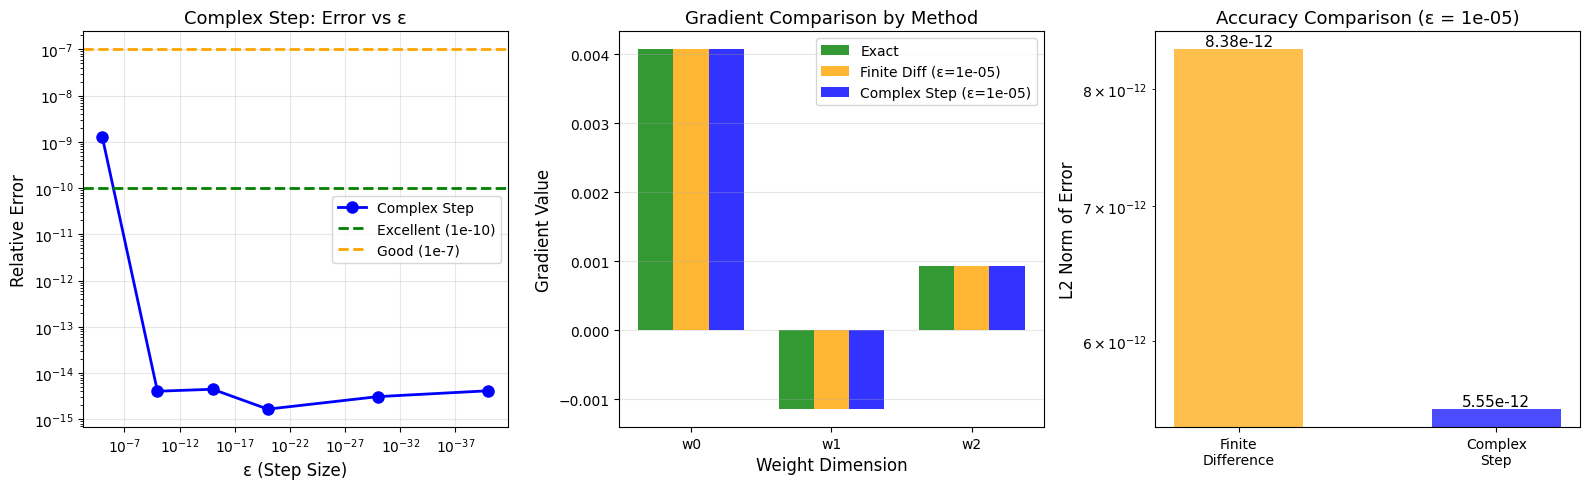

In [66]:
print("Visualization")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Error vs epsilon for complex step
epsilons = [r['epsilon'] for r in results_complex]
relative_errors = [r['relative_error'] for r in results_complex]

axes[0].loglog(epsilons, relative_errors, 'o-', linewidth=2, markersize=8,
               color='blue', label='Complex Step')
axes[0].axhline(y=1e-10, color='green', linestyle='--', linewidth=2,
                label='Excellent (1e-10)')
axes[0].axhline(y=1e-7, color='orange', linestyle='--', linewidth=2,
                label='Good (1e-7)')
axes[0].set_xlabel('ε (Step Size)', fontsize=12)
axes[0].set_ylabel('Relative Error', fontsize=12)
axes[0].set_title('Complex Step: Error vs ε', fontsize=13)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].invert_xaxis()

# Plot 2: Compare gradients per dimension
dims = np.arange(d)
width = 0.25

axes[1].bar(dims - width, grad_exact, width, alpha=0.8, color='green',
            label='Exact')
axes[1].bar(dims, grad_fd, width, alpha=0.8, color='orange',
            label=f'Finite Diff (ε={epsilon_test:.0e})')
axes[1].bar(dims + width, grad_cs, width, alpha=0.8, color='blue',
            label=f'Complex Step (ε={epsilon_test:.0e})')
axes[1].set_xlabel('Weight Dimension', fontsize=12)
axes[1].set_ylabel('Gradient Value', fontsize=12)
axes[1].set_title('Gradient Comparison by Method', fontsize=13)
axes[1].set_xticks(dims)
axes[1].set_xticklabels([f'w{i}' for i in range(d)])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Plot 3: Error comparison
methods = ['Finite\nDifference', 'Complex\nStep']
errors = [diff_fd, diff_cs]
colors = ['orange', 'blue']

bars = axes[2].bar(methods, errors, color=colors, alpha=0.7, width=0.5)
axes[2].set_ylabel('L2 Norm of Error', fontsize=12)
axes[2].set_title(f'Accuracy Comparison (ε = {epsilon_test:.0e})', fontsize=13)
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, error in zip(bars, errors):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{error:.2e}',
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


In [70]:
print(f"""
Observations:
1. Complex Step Method:
   - Works with extremely small ε (down to 1e-40)
   - No subtractive cancellation error
   - Relative error: {results_complex[0]['relative_error']:.2e} at ε=1e-5
   - Relative error: {results_complex[-1]['relative_error']:.2e} at ε=1e-40

2. Finite Differences:
   - Error: {diff_fd:.2e} at ε=1e-5
   - Limited by roundoff errors for small ε

3. Accuracy Improvement:
   - Complex Step is {diff_fd/diff_cs:.1f}x more accurate
   - More stable across wide range of ε values""")


Observations:
1. Complex Step Method:
   - Works with extremely small ε (down to 1e-40)
   - No subtractive cancellation error
   - Relative error: 1.28e-09 at ε=1e-5
   - Relative error: 4.14e-15 at ε=1e-40

2. Finite Differences:
   - Error: 8.38e-12 at ε=1e-5
   - Limited by roundoff errors for small ε
   
3. Accuracy Improvement:
   - Complex Step is 1.5x more accurate
   - More stable across wide range of ε values
